In [68]:
from sklearn import svm, datasets
iris = datasets.load_iris()

In [69]:
import pandas as pd
import numpy as np
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['flower'] = iris.target
df['flower'] = df['flower'].apply(lambda x:iris.target_names[x])
df[47:52]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
47,4.6,3.2,1.4,0.2,setosa
48,5.3,3.7,1.5,0.2,setosa
49,5.0,3.3,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor


In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)

In [71]:
model = svm.SVC(kernel='rbf',C=30,gamma='auto')
model.fit(X_train,y_train)
model.score(X_test,y_test)

1.0

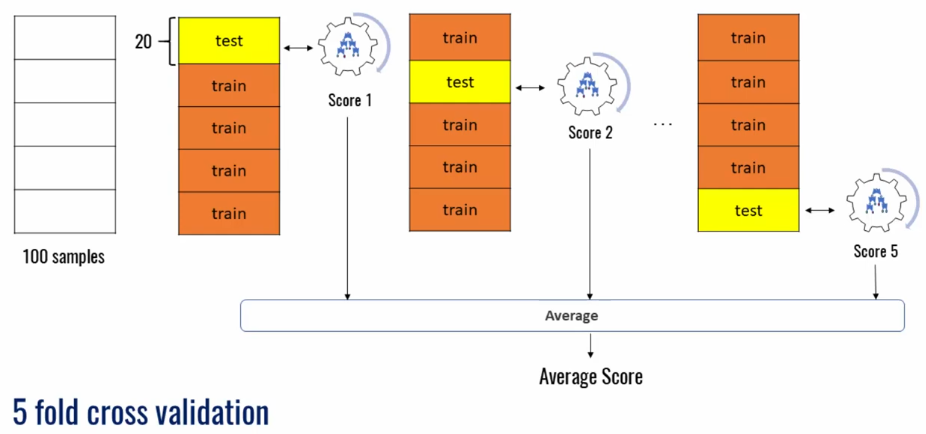

In [72]:
from sklearn.model_selection import cross_val_score

In [73]:
cross_val_score(svm.SVC(kernel='linear',C=10,gamma='auto'),iris.data,iris.target,cv=5)


array([1.        , 1.        , 0.9       , 0.96666667, 1.        ])

In [74]:
cross_val_score(svm.SVC(kernel='rbf',C=10,gamma='auto'),iris.data,iris.target,cv=5)

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [75]:
cross_val_score(svm.SVC(kernel='rbf',C=20,gamma='auto'),iris.data,iris.target,cv=5)

array([0.96666667, 1.        , 0.9       , 0.96666667, 1.        ])

In [76]:
kernels = ['rbf','linear']
C = [1,10,20]
avg_scores = {}
for kval in kernels:
    for cval in C:
        cv_score = cross_val_score(svm.SVC(kernel=kval,C=cval,gamma='auto'),iris.data,iris.target,cv=5)
        avg_scores[kval+'_'+str(cval)] = np.average(cv_score)
avg_scores

{'rbf_1': 0.9800000000000001,
 'rbf_10': 0.9800000000000001,
 'rbf_20': 0.9666666666666668,
 'linear_1': 0.9800000000000001,
 'linear_10': 0.9733333333333334,
 'linear_20': 0.9666666666666666}

# GridSearchCV

In [77]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(svm.SVC(gamma='auto'),{
    'C':[1,10,20],
    'kernel':['rbf','linear']
}, cv=5, return_train_score=False)

clf.fit(iris.data,iris.target)
clf.cv_results_

{'mean_fit_time': array([0.00280294, 0.00119257, 0.00148792, 0.00127378, 0.00137954,
        0.00127316]),
 'std_fit_time': array([2.34937089e-03, 1.06683829e-04, 6.05448760e-05, 1.35035754e-04,
        1.34910235e-04, 2.60250015e-05]),
 'mean_score_time': array([0.00138645, 0.00083494, 0.00100155, 0.00084944, 0.00100269,
        0.00088472]),
 'std_score_time': array([6.45168312e-04, 7.86759636e-05, 2.66237449e-05, 1.02437718e-04,
        2.43657564e-04, 3.15489676e-05]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'ker

In [78]:
df = pd.DataFrame(clf.cv_results_)

In [79]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002803,0.002349,0.001386,0.000645,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
1,0.001193,0.000107,0.000835,0.000079,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
2,0.001488,0.000061,0.001002,0.000027,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
3,0.001274,0.000135,0.000849,0.000102,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.966667,1.0,0.973333,0.038873,4
4,0.001380,0.000135,0.001003,0.000244,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.966667,1.0,0.900000,0.966667,1.0,0.966667,0.036515,5
5,0.001273,0.000026,0.000885,0.000032,20,linear,"{'C': 20, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.933333,1.0,0.966667,0.042164,6


In [80]:
df[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.980000
1,1,linear,0.980000
2,10,rbf,0.980000
3,10,linear,0.973333
4,20,rbf,0.966667
5,20,linear,0.966667


In [81]:
dir(clf)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 '_validate_params',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'inverse_transform',
 'multimetric_',
 'n_fe

In [82]:
clf.best_score_

0.9800000000000001

In [83]:
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

# RandomizedSeachCV

In [84]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(svm.SVC(gamma='auto'),{
        'C':[1,10,20],
        'kernel':['rbf','linear']
    },
    cv=5,
    return_train_score=False,
    n_iter=2
)
rs.fit(iris.data,iris.target)
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.980000
1,20,rbf,0.966667


# Choosing Best Model for a given Dataset

In [85]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [86]:
model_params = {
    'svm':{
        'model':svm.SVC(gamma='auto'),
        'params':{
            'C':[1,10,20],
            'kernel':['rbf','linear']
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,5,10]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'C':[1,5,10]
        }
    }
}

In [89]:
scores = []
for model_name,mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(iris.data,iris.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [91]:
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.980000,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.966667,{'n_estimators': 10}
2,logistic_regression,0.966667,{'C': 5}
